In [1]:
#if you don't have mne package installed on your pc / you're programming outside your machine (colab)
!pip install mne

     |████████████████████████████████| 7.4 MB 25.1 MB/s 


In [2]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mne
from scipy import signal, stats
from google.colab import drive

In [3]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


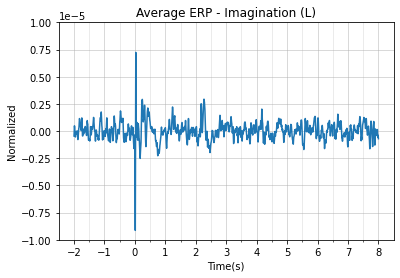

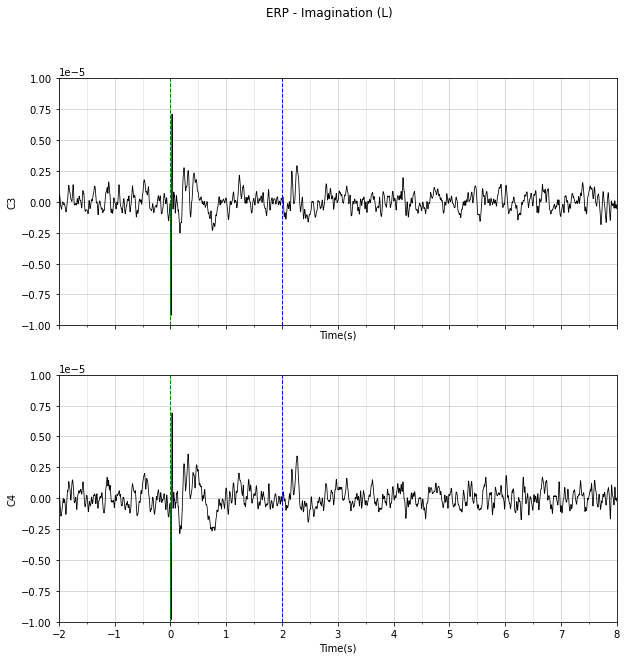

In [24]:
#Script that help us to plot the ERP signals, and computes some statistics tests over a time window.

#Left arm movement/imagination

#Loading the datasets
dados_eeg = []
for i in range (3):
    if i < 9:
        data_folder = '/content/gdrive/MyDrive/Dados_EEG/Grupo imaginacao/S0'+str(i+1)+'/Sem re-referenciar'
        voluntario  = '/S0'+str(i+1)+'_11-epo'
    else:
        data_folder = '/content/gdrive/MyDrive/Dados_EEG/Grupo imaginacao/S'+ str(i+1)+'/Sem re-referenciar'
        voluntario  = '/S' +str(i+1)+'_11-epo'
   
    dados_epocas = mne.read_epochs(data_folder + voluntario + '.fif',verbose=False)
    dados_eeg.append(dados_epocas.get_data(picks='eeg'))

#Taking the ERP variable and calculating the mean
dados_erp_aux = np.zeros((3, 30, 6001))
for indice in range (3):
    dados_erp_aux[indice,:,:] = np.mean(dados_eeg[indice], axis=0)
dados_erp = np.mean(dados_erp_aux, axis=0)
fs = dados_epocas.info['sfreq']
ch_name = dados_epocas.ch_names
t = np.arange(-2, 8, 1/fs)
t1windowL = dados_erp[:, 200: 700]
t2windowL = dados_erp[:,2200:2700]

#Plotting the subjects average ERP
fig = plt.figure()
ax  = fig.add_subplot(1, 1, 1)
major_ticks_top = np.linspace(-2, 8, 11)
minor_ticks_top = np.linspace(-2, 8, 21)
ax.set_xticks(major_ticks_top)
ax.set_xticks(minor_ticks_top, minor=True)
ax.grid(which="major", alpha=0.6)
ax.grid(which="minor", alpha=0.3)
plt.xlabel('Time(s)')
plt.ylabel('Normalized')
plt.plot(t, dados_erp[19, :-1])
plt.title('Average ERP - Imagination (L)')
plt.ylim((-10e-6, 10e-6))

plt.show()

print(' ')

#Plotting the chosen channels
xlim = (-2, 8)
ylim = (-10e-6, 10e-6)
ind_plots = [3, 4]
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True, figsize=(10,10))
plt.suptitle('ERP - Imagination (L)')
fig.subplots_adjust(wspace=0.08)
major_ticks_top = np.linspace(-2, 8, 11)
minor_ticks_top = np.linspace(-2, 8, 21)
for ind, ax in enumerate(axes.flatten()):
    ax.plot(t, dados_erp[ind_plots[ind],:-1],linewidth=0.8, color='k')
    ax.set_ylim(ylim)
    ax.set_xlim(xlim)
    ax.set_xlabel('Time(s)')
    ax.set_xticks(major_ticks_top)
    ax.set_xticks(minor_ticks_top, minor=True)
    ax.grid(which="major", alpha=0.6)
    ax.grid(which="minor", alpha=0.3)
    ax.set(ylabel=ch_name[ind_plots[ind]])
    ax.axvline(x=2, linewidth=1, color='b', linestyle="--")
    ax.axvline(x=0, linewidth=1, color='g', linestyle="--")

plt.show()

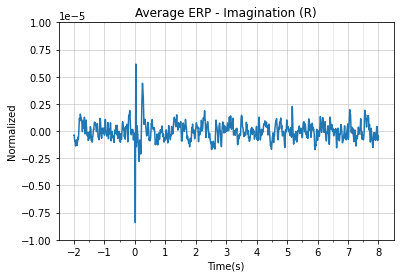

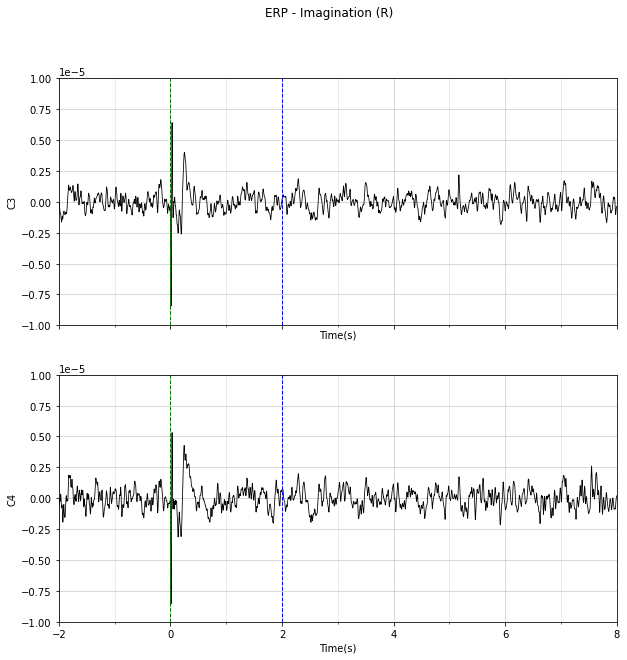

In [34]:
#Right Arm movement/imagination

#Loading the datasets
dados_eeg_dir = []
for i in range (3):
    if i < 9:
        data_folder = '/content/gdrive/MyDrive/Dados_EEG/Grupo imaginacao/S0'+str(i+1)+'/Sem re-referenciar'
        voluntario  = '/S0'+str(i+1)+'_21-epo'
    else:
        data_folder = '/content/gdrive/MyDrive/Dados_EEG/Grupo imaginacao/S'+ str(i+1)+'/Sem re-referenciar'
        voluntario  = '/S' +str(i+1)+'_21-epo'
   
    dados_epocas_dir = mne.read_epochs(data_folder + voluntario + '.fif',verbose=False)
    dados_eeg_dir.append(dados_epocas_dir.get_data(picks='eeg'))


#Taking the ERP variable and calculating the mean
dados_erp_aux_dir = np.zeros((3, 30, 6001))
for indice in range (3):
    dados_erp_aux_dir[indice,:,:] = np.mean(dados_eeg_dir[indice], axis=0)
dados_erp_dir = np.mean(dados_erp_aux_dir, axis=0)
fs_dir = dados_epocas_dir.info['sfreq']
ch_name_dir = dados_epocas_dir.ch_names
t1windowR = dados_erp_dir[:, 200: 700]
t2windowR = dados_erp_dir[:,2200:2700]

#Plotting the subjects average ERP
fig = plt.figure()
ax  = fig.add_subplot(1, 1, 1)
major_ticks_top = np.linspace(-2, 8, 11)
minor_ticks_top = np.linspace(-2, 8, 21)
ax.set_xticks(major_ticks_top)
ax.set_xticks(minor_ticks_top, minor=True)
ax.grid(which="major", alpha=0.6)
ax.grid(which="minor", alpha=0.3)
plt.plot(t, dados_erp_dir[19, :-1])
plt.xlabel('Time(s)')
plt.ylabel('Normalized')
plt.ylim((-10e-6, 10e-6))
plt.title('Average ERP - Imagination (R)')
plt.show()

print(' ')

#Plotting the chosen channels
xlim = (-2, 8)
ylim = (-10e-6, 10e-6)
ind_plots = [3, 4]
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True, figsize=(10,10))
plt.suptitle('ERP - Imagination (R)')
fig.subplots_adjust(wspace=0.08)
major_ticks_top = np.linspace(-2, 8, 11)
minor_ticks_top = np.linspace(-2, 8, 21)
for ind, ax in enumerate(axes.flatten()):
    ax.plot(t, dados_erp_dir[ind_plots[ind],:-1],linewidth=0.8, color='k')
    ax.set_ylim(ylim)
    ax.set_xlim(xlim)
    ax.set_xlabel('Time(s)')
    ax.set_xticks(major_ticks_top,minor=True)
    ax.grid(which="major", alpha=0.6)
    ax.grid(which="minor", alpha=0.3)
    ax.set(ylabel=ch_name_dir[ind_plots[ind]])
    ax.axvline(x=2, linewidth=1, color='b', linestyle="--")
    ax.axvline(x=0, linewidth=1, color='g', linestyle="--")

plt.savefig(fname='ERP - Imagination (R)')
plt.show()

In [19]:
#Checking if the C3's ERP differs from C4's (statistically), by doing a paired T-test.

c3xc4_R = stats.ttest_rel(t1windowR[3],t1windowR[4])
c3xc4_L = stats.ttest_rel(t1windowL[3],t1windowL[4])

#Now, checking the same channel, but in different arms movement

c3xc3_RxL = stats.ttest_rel(t1windowL[3],t1windowR[3])
c4xc4_RxL = stats.ttest_rel(t1windowL[4],t1windowR[4])


statlist = [['C3 vs C4 (R)',c3xc4_R[1]],['C3 vs C4 (L)',c3xc4_L[1]],['C3 (R) vs C3 (L)',c3xc3_RxL[1]],['C4 (R) vs C4 (L)',c4xc4_RxL[1]]]
df = pd.DataFrame(statlist,columns=['Comparison','P-Value'])

df

,Comparison,P-Value
0,C3 vs C4 (R),0.000034
1,C3 vs C4 (L),0.000114
2,C3 (R) vs C3 (L),0.094147
3,C4 (R) vs C4 (L),0.000325


In [20]:
#Same analysis made before, but using the second time window (2200-2700ms), that means during the movement.

c3xc4_R2 = stats.ttest_ind(t2windowR[3],t2windowR[4])
c3xc4_L2 = stats.ttest_ind(t2windowL[3],t2windowL[4])

c3xc3_RxL2 = stats.ttest_ind(t2windowL[3],t2windowR[3])
c4xc4_RxL2 = stats.ttest_ind(t2windowL[4],t2windowR[4])


statlist = [['C3 vs C4 (R)',c3xc4_R2[1]],['C3 vs C4 (L)',c3xc4_L2[1]],['C3 (R) vs C3 (L)',c3xc3_RxL2[1]],['C4 (R) vs C4 (L)',c4xc4_RxL2[1]]]
df = pd.DataFrame(statlist,columns=['Comparison','P-Value'])

df

,Comparison,P-Value
0,C3 vs C4 (R),0.894110
1,C3 vs C4 (L),0.459170
2,C3 (R) vs C3 (L),0.357354
3,C4 (R) vs C4 (L),0.934212
